In [186]:
import numpy as np
import pandas as pd

In [187]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [188]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [189]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1759,ham,Do u ever get a song stuck in your head for no...,NaN,NaN,NaN
2446,ham,"Sorry, I'll call later",NaN,NaN,NaN
5361,ham,Yep get with the program. You're slacking.,NaN,NaN,NaN
2775,ham,We confirm eating at esplanade?,NaN,NaN,NaN
2030,ham,"Ugh y can't u just apologize, admit u were wro...",NaN,NaN,NaN


### 1.Data Cleaning
### 2.EDA
### 3.Text Preprocessing
### 4.Model Building
### 5.Evaluation
### 6.Imporvement
### 7.Website
### 8.Deploy

# 1.Data Cleaning

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [191]:
#Drop last 3 cols
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [192]:
df.sample(5)

,v1,v2
4923,ham,We can go 4 e normal pilates after our intro...
3517,ham,Are you willing to go for apps class.
2377,spam,YES! The only place in town to meet exciting a...
1784,ham,"Dont search love, let love find U. Thats why i..."
4586,ham,"I'll see if I can swing by in a bit, got some ..."


In [193]:
#Renaming col
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)
df.sample(5)

,target,text
4358,ham,ÌÏ only send me the contents page...
2228,ham,Those were my exact intentions
5176,ham,Company is very good.environment is terrific a...
4636,ham,Oh ho. Is this the first time u use these type...
4109,ham,"Yo, you gonna still be in stock tomorrow/today..."


In [194]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [195]:
df["target"]=encoder.fit_transform(df["target"])

In [196]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [197]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [198]:
df.duplicated().sum()

403

In [199]:
df.drop_duplicates(keep="first", inplace=True)

In [200]:
df.shape

(5169, 2)

# 2.EDA

In [201]:
df.value_counts("target")

target
0    4516
1     653
Name: count, dtype: int64

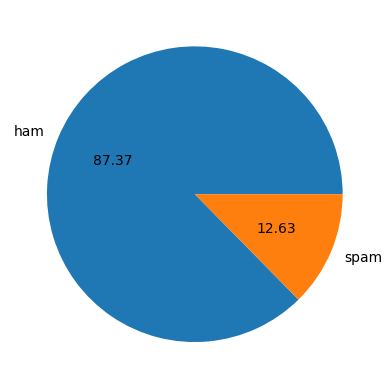

In [202]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [203]:
#Data is imbalance(keep in mind)

In [204]:
import nltk #natural language toolkit

In [205]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [206]:
df["num_characters"]=df["text"].apply(len)

In [207]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [208]:
#num of words
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [209]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [210]:
#num of words
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [211]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [212]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [213]:
#ham
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [214]:
#spam
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [215]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

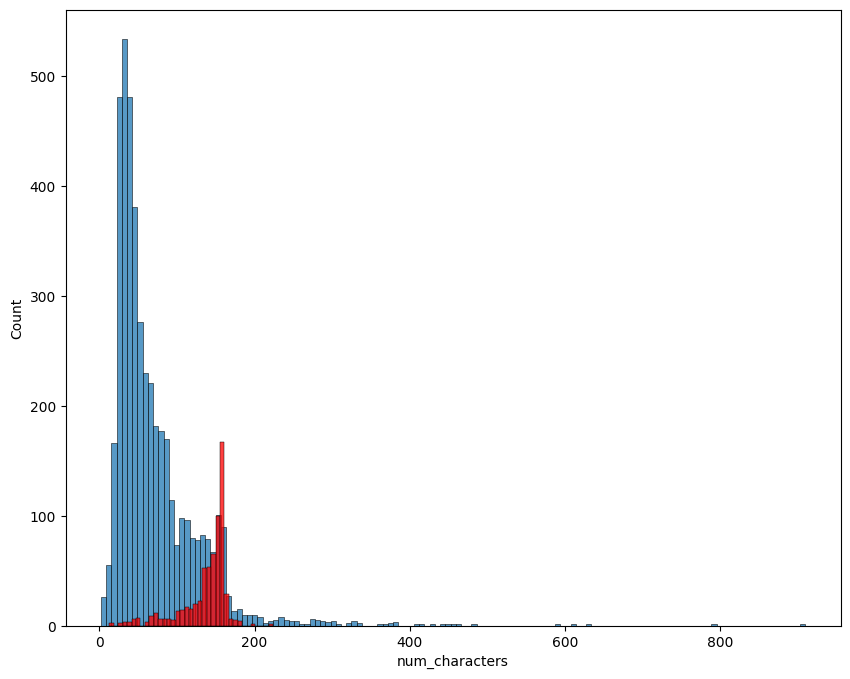

In [216]:
plt.figure(figsize=(10,8))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color="red")

<Axes: xlabel='num_words', ylabel='Count'>

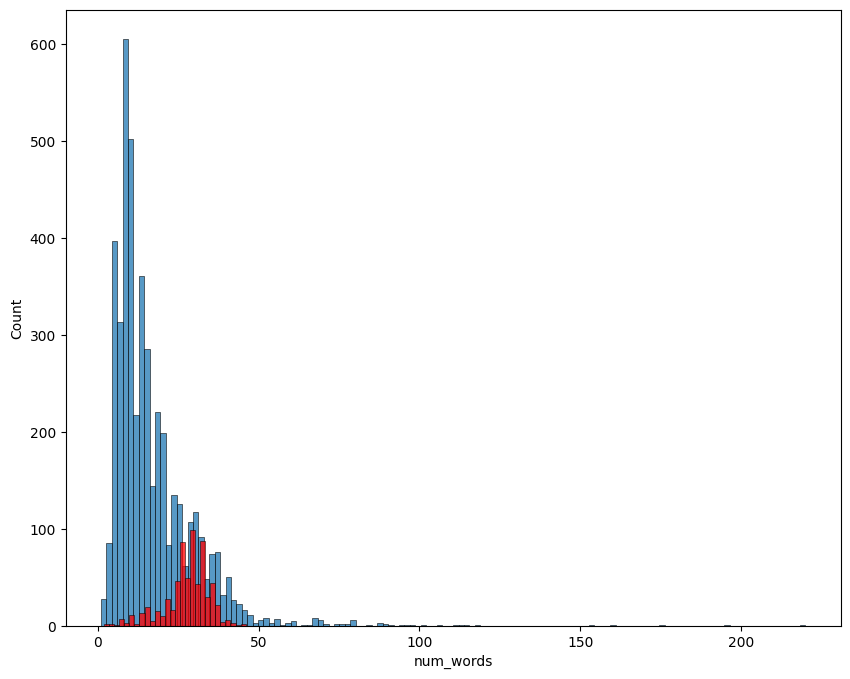

In [217]:
plt.figure(figsize=(10,8))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")

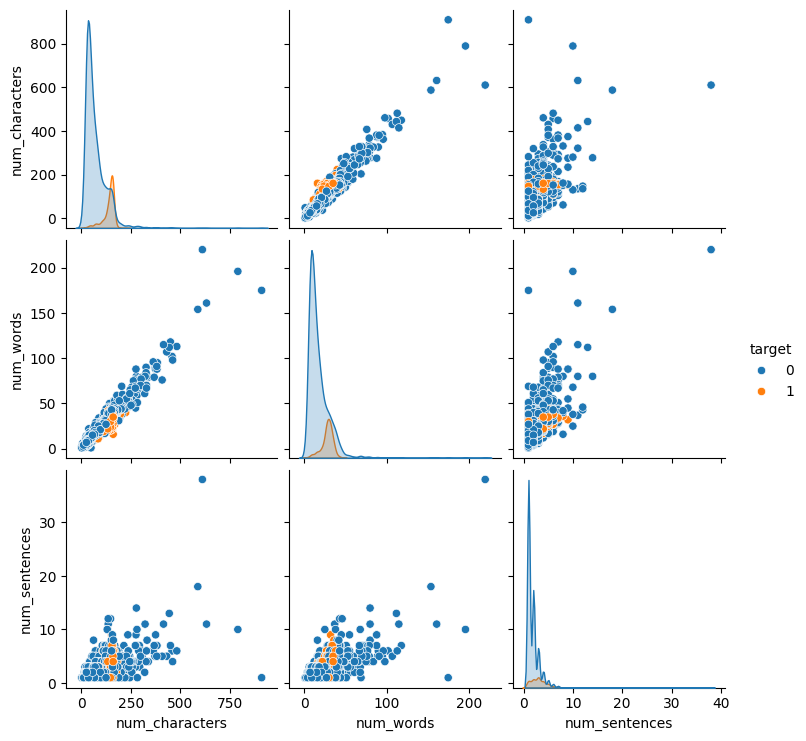

In [218]:
sns.pairplot(df, hue="target")

In [219]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

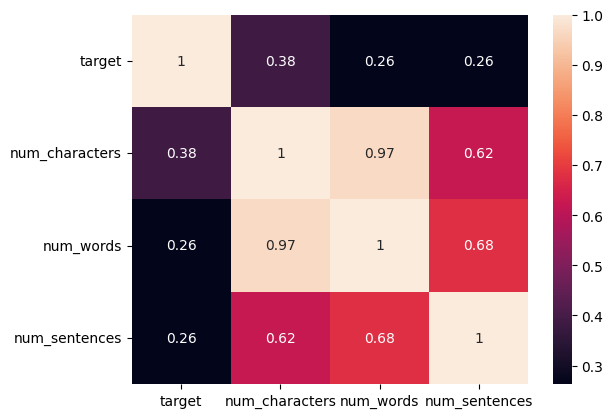

In [220]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# 3.Data Preprocessing
- lower case
- Tokenization
- Removing special Characters
- removing stop words and punctuation
- stemming

In [221]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

'love'

In [222]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [223]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [224]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
      if i.isalnum():
        y.append(i)
    text=y[:]
    y.clear()
    for i in text:
      if i not in stopwords.words("english") and i not in string.punctuation:
        y.append(i)

    text=y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))
    return " ".join(y)

In [225]:
transform_text("I love watching the yt lectures on Machine learning.How about you?")

'love watch yt lectur machin'

In [226]:
df["transformed_text"]=df["text"].apply(transform_text)

In [227]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [228]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [229]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

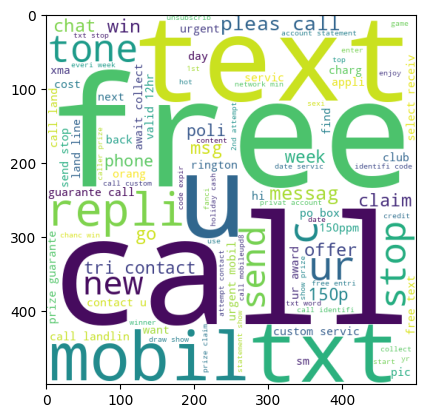

In [230]:
plt.imshow(spam_wc)

In [231]:
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

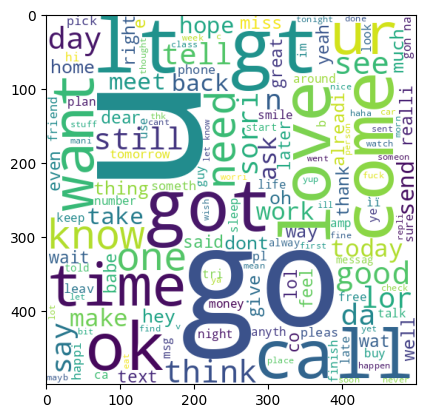

In [232]:
plt.imshow(ham_wc)

In [233]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [234]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [235]:
len(spam_corpus)

9939

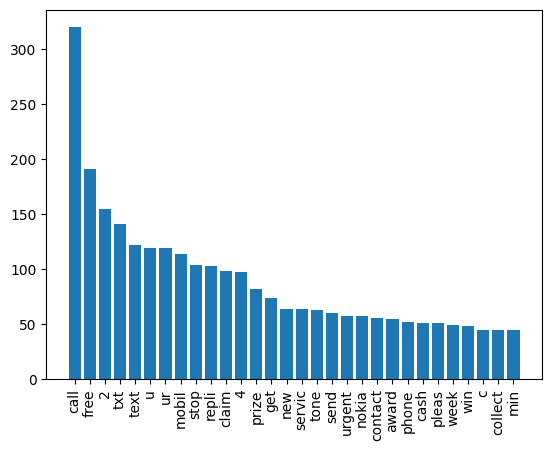

In [236]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [237]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [238]:
len(ham_corpus)

35404

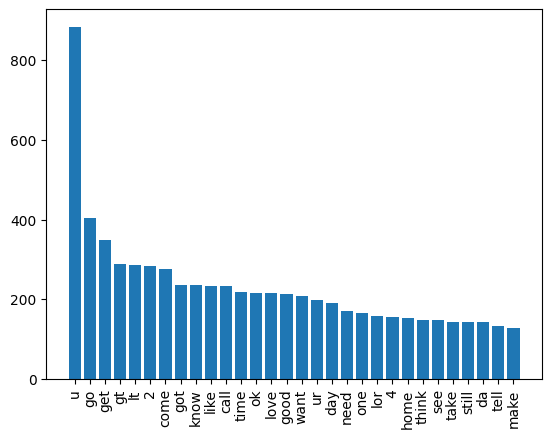

In [239]:
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [240]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
cv=CountVectorizer()

In [241]:
x=tfidf.fit_transform(df["transformed_text"]).toarray()

In [242]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#x=scaler.fit_transform(x)
x.shape

(5169, 3000)

In [243]:
# Apending the num_character col to x
#x=np.hstack((x,df["num_characters"].values.reshape(-1,1)))
#x.shape

In [244]:
y=df["target"].values

In [245]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [248]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [249]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [250]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [251]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [252]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Selecting tfidf and mnb, precision matters the most because of imbalance data.

- let's check some other models too...

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [254]:
svc=SVC(kernel="sigmoid", gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear", penalty="l1")
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [255]:
clfs={
    "SVC":svc,
    "KN":knc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "XGB":xgb
}

In [256]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [257]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [258]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("for ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
for  KN
Accuracy -  0.9052224371373307
Precision -  1.0
for  NB
Accuracy -  0.9709864603481625
Precision -  1.0
for  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
for  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
for  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
for  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
for  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
for  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
for  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
for  XGB
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [259]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_scores, "Precision":precision_scores}).sort_values("Precision",ascending=False)

In [260]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [261]:
performance_df1=pd.melt(performance_df, id_vars="Algorithm")

In [262]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,XGB,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


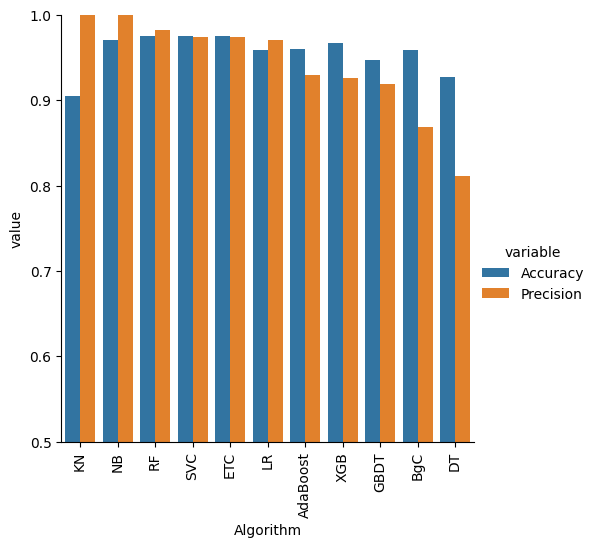

In [263]:
sns.catplot(x="Algorithm", y="value",hue="variable", data=performance_df1,kind="bar",height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

# Model improve
### 1.Change the max_features parameter of Tfidf

In [264]:
temp_df=pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy_max_ft_3000":accuracy_scores, "Precision_max_ft_3000":precision_scores}).sort_values("Precision_max_ft_3000",ascending=False)

In [265]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [266]:
new_df=performance_df.merge(temp_df,on="Algorithm")

In [267]:
new_df_scaled=new_df.merge(temp_df,on="Algorithm")

In [268]:
new_df_scaled.merge(temp_df,on="Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,XGB,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [269]:
#Voting Classifier
svc=SVC(kernel="sigmoid", gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [270]:
voting=voting.fit(x_train,y_train)

In [271]:
y_pred=voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [272]:
#applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [273]:
from sklearn.ensemble import StackingClassifier

In [274]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [275]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [276]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))